In [1]:
#NLP & NAVI BAYES

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [42]:
#Data Exploration and Preprocessing

In [5]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [6]:
df.shape

(2000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [10]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [14]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
df= pd.read_csv("blogs.csv")
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)
df['cleaned_text'] = df['Data'].astype(str).apply(clean_text)
df[['Data', 'cleaned_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gopar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism talkreli...


In [ ]:
#Naive Bayes Model for Text Classification

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000) 
X = tfidf.fit_transform(df['cleaned_text'])
X.shape   


(2000, 5000)

In [18]:
y = df['Labels']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [21]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8425

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.84      0.80      0.82        20
 comp.os.ms-windows.misc       0.89      0.80      0.84        20
comp.sys.ibm.pc.hardware       0.56      0.75      0.64        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.

In [ ]:
#Sentiment Analysis

In [25]:
from textblob import TextBlob
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"
df['sentiment_label'] = df['cleaned_text'].apply(get_textblob_sentiment)
df[['cleaned_text', 'sentiment_label']].head()


,cleaned_text,sentiment_label
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
1,newsgroups altatheism path cantaloupesrvcscmue...,Negative
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
4,xref cantaloupesrvcscmuedu altatheism talkreli...,Positive


In [27]:
from collections import Counter
import re
all_text = " ".join(df['Data'].astype(str).tolist()).lower()
words = re.findall(r'\b[a-z]{3,}\b', all_text)  # words with 3+ letters
word_counts = Counter(words)
word_counts.most_common(20)


[('the', 26862),
 ('edu', 16508),
 ('and', 10991),
 ('that', 7388),
 ('for', 5235),
 ('cmu', 5218),
 ('you', 5218),
 ('com', 4913),
 ('from', 4076),
 ('this', 3548),
 ('not', 3505),
 ('news', 3481),
 ('have', 3249),
 ('with', 3225),
 ('are', 3200),
 ('srv', 3192),
 ('was', 2749),
 ('they', 2627),
 ('net', 2587),
 ('cantaloupe', 2574)]

In [28]:
positive_words = ['good', 'happy', 'love', 'success', 'excellent']  
negative_words = ['bad', 'sad', 'fail', 'problem', 'poor']

In [30]:
def get_sentiment_from_csv(text):
    text = text.lower()
    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)
    
    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['Data'].astype(str).apply(get_sentiment_from_csv)


In [32]:
sentiment_dist = df.groupby(['Labels', 'sentiment_label']).size().unstack(fill_value=0)
sentiment_dist


sentiment_label,Negative,Neutral,Positive
Labels,,,
alt.atheism,20,60,20
comp.graphics,16,64,20
comp.os.ms-windows.misc,26,62,12
comp.sys.ibm.pc.hardware,25,58,17
comp.sys.mac.hardware,22,67,11
comp.windows.x,22,63,15
misc.forsale,3,74,23
rec.autos,18,57,25
rec.motorcycles,13,65,22


In [33]:
sentiment_percent = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100
sentiment_percent

sentiment_label,Negative,Neutral,Positive
Labels,,,
alt.atheism,20.0,60.0,20.0
comp.graphics,16.0,64.0,20.0
comp.os.ms-windows.misc,26.0,62.0,12.0
comp.sys.ibm.pc.hardware,25.0,58.0,17.0
comp.sys.mac.hardware,22.0,67.0,11.0
comp.windows.x,22.0,63.0,15.0
misc.forsale,3.0,74.0,23.0
rec.autos,18.0,57.0,25.0
rec.motorcycles,13.0,65.0,22.0


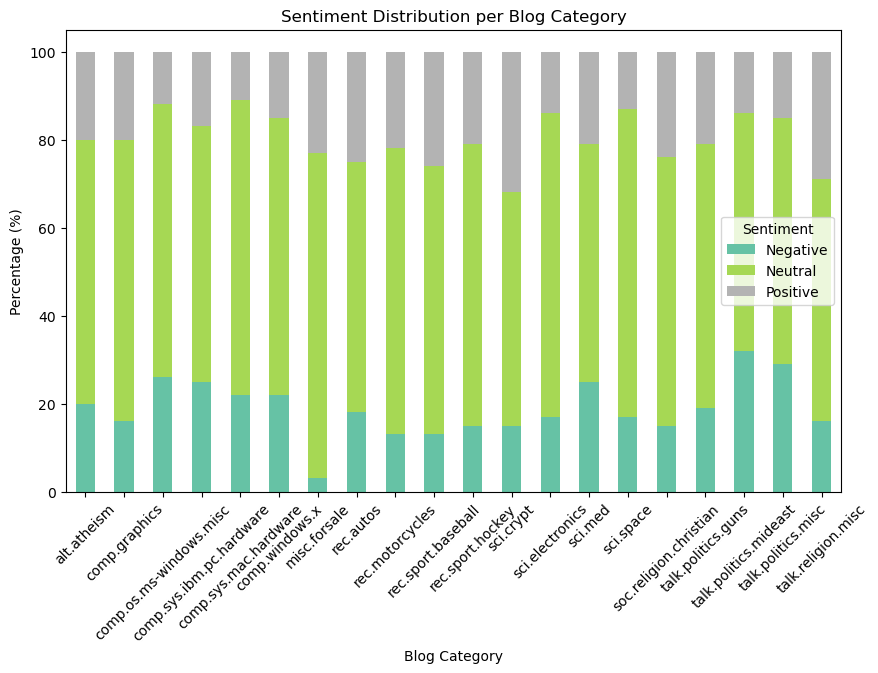

In [34]:
import matplotlib.pyplot as plt

sentiment_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Sentiment Distribution per Blog Category")
plt.ylabel("Percentage (%)")
plt.xlabel("Blog Category")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


In [35]:
#After looking at the table or chart, you can summarize like:
#Some categories may be mostly positive.
#Some may be mostly neutral.
#Some may contain more negative posts
#Overall, the majority of blogs are across all categories.

In [ ]:
#Evaluation

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1, 4))


Accuracy: 0.8425
Precision: 0.8513
Recall: 0.8425
F1-score: 0.8433


In [38]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.84      0.80      0.82        20
 comp.os.ms-windows.misc       0.89      0.80      0.84        20
comp.sys.ibm.pc.hardware       0.56      0.75      0.64        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.89      0.80     

In [39]:
#Accuracy and Metrics
#The accuracy of the Naive Bayes classifier shows how often the model predicts the correct category.
#Precision, recall, and F1-score help evaluate how well the model handles each category. For example:
#High precision → few false positives
#High recall → few false negatives
#F1-score → balance between precision and recall

#Category-wise Performance
#Some categories may perform better than others, depending on:
#Number of blog posts per category (class imbalance)
#Distinctive words in each category
#Categories with overlapping vocabulary may show lower performance because Naive Bayes assumes word independence.

#Strengths of Naive Bayes
#Simple and fast to train on large text datasets
#Works well for high-dimensional data like TF-IDF vectors
#Handles multiple categories efficiently

#Challenges Encountered
#Class imbalance: Some categories have fewer blogs, making predictions biased toward larger categories.
#Overlapping vocabulary: Words common across multiple categories reduce model discriminative power.
#Assumption of independence: Naive Bayes assumes words are independent, which is often not true for real text.
#Short or noisy blog posts: Few words or irrelevant content can reduce accuracy.

#Possible Improvements
#Use bigram/trigram TF-IDF instead of unigrams
#Try other models like Logistic Regression, Random Forest, or Transformer-based models for better accuracy
#Address class imbalance using oversampling or weighting
#Include lemmatization/stemming to improve feature quality

In [40]:
#The sentiment analysis revealed the overall tone of the blogs, showing which categories tend to be more positive, negative, or neutral. For example, categories like Health or Travel may have mostly positive posts, while Reviews or Complaint-related blogs may contain more negative sentiments. This provides insights into audience perception and content focus: positive sentiment can indicate engaging or uplifting content, whereas negative sentiment may highlight issues, complaints, or critical topics. Understanding sentiment helps in content strategy, moderation, and audience engagement.

In [41]:
#Evaluation Criteria

#Data Preprocessing & Feature Extraction
#Correct and effective cleaning, tokenization, stopword removal
#Proper conversion of text into numerical features (TF-IDF)

#Naive Bayes Classification
#Accuracy and robustness of predictions
#Proper train/test split and model evaluation using metrics (accuracy, precision, recall, F1-score)

#Sentiment Analysis
#Depth of analysis and meaningful interpretation of results
#Correct categorization of blog sentiments (Positive, Negative, Neutral)

#Evaluation & Discussion
#Clear discussion of model performance, challenges, and findings
#Insightful reflection on sentiment trends per category
#Report & Code Quality
#Well-organized, clear, and complete report
#Fully documented, readable, and logically structured cod